# Lab 3: Pandas

(Last update: 01/12/2024)

Full name: `Lê Hoàng Vũ`
Student ID: `22120461`

---

**Summary**: In this assignment, you are going to learn how to use `Pandas`. Loops, and methods such as `apply/applymap` are not allowed to use unless specifically instructed to do so.

## 0. General instructions

### 0.0. Work on assignment

- You will do your assignment directly on this notebook file. First, you fill your name and student code at the beginning of the file. In this file, you will write your code when you see the following lines of code:
    ```python
    # TODO
    raise NotImplementedError()
    ```

    For optional coding parts, there will be:

    ```python
    # TODO (OPTIONAL)
    ```

    For markdown cell, there will be:

    ```markdown
    **TODO**: ...
    ```

- Of course, you have to remove the `raise NotImplementedError()` statement when you finish.

- For coding parts, there are often cells below to help you check your answers. You will pass the test if there are no errors when you run the test cells. In some cases, the tests are insufficient. That means if you do not pass the test, your answer is definitely wrong somewhere, but if you pass the test, your answer may still be incorrect.

- While doing the assignment, you should print out the output and create more cells for testing. But you have to remove all of them (comment your print-out codes, delete the cell created by you) when you submit your code. <font color=red>Do not remove or edit my cells</font> (except for the aforementioned cells).

- Keep your code clean and clear by using meaningful variable names and comments, not write too-long coding lines. Press `Ctrl + S` right after editing.

- **Keep it real**: The reason why you are here is to <font color=green>study, really study</font>. I highly recommend that you discuss your idea with your friends and <font color=green>write your own code based on your own knowledge</font>. <font color=red>Copy means zero.</font>

### 0.1. Submit your assignment

- When grading your assignment, I will choose `Kernel` - `Restart & Run All` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

- After that, rename the notebook as `<StudentID>.ipynb`. For example, if your student code is 1234567, then your notebook is `1234567.ipynb`.

- Finally, submit your notebook file on Moodle. <font color=red>Please strictly follow the submission rules.</font>

---

## 1. Import libraries

In [126]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import warnings
warnings.simplefilter('ignore')

# TODO (OPTION): import your libraries
import seaborn as sns

## 2. Data collection

- In this assignment, you are going to analyze **Most Streamed Spotify Songs 2024**. You are provided the following files:
    - `./Most Streamed Spotify Songs 2024.csv`.

- Data source: [Most Streamed Spotify Songs 2024 - Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024).

## 3. Data pre-processing and exploration

- In this section, you are going to explore features of data. First, you have to read the data from `./Most Streamed Spotify Songs 2024.csv` and store it into a dataframe called `df`.

In [127]:
# TODO: read data from ./Most Streamed Spotify Songs 2024.csv and save to df then display 5 first lines of data
df = pd.read_csv('./Most Streamed Spotify Songs 2024.csv', encoding = 'utf-8', encoding_errors= 'ignore')
print(df.head())
# raise NotImplementedError()

                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score Spotify Streams  \
0    4/26/2024  QM24S2402528             1        725.4     390,470,936   
1     5/4/2024  USUG12400910             2        545.9     323,703,884   
2    3/19/2024  QZJ842400387             3        538.4     601,309,283   
3    1/12/2023  USSM12209777             4        444.9   2,031,280,633   
4    5/31/2024  USUG12403398             5        423.3     107,034,922   

  Spotify Playlist Count Spotify Playlist Reach  ...  SiriusXM Spins  \
0 

### 3.0. How many rows/columns are there in the dataset?

- Save the number of rows and columns to `n_rows, n_cols`

In [128]:
# TODO: save your answer to n_rows, n_cols
n_rows, n_cols = df.shape
print(df.shape)
# raise NotImplementedError()

(4600, 29)


In [129]:
# TEST
assert (n_rows, n_cols) == (4600, 29)

### 3.1. Explore rows

- Is there any duplicate row? You will check it using `Pandas`.

In [130]:
# TODO: save your answer to is_duplicate
is_duplicate = df.duplicated().any()
print(is_duplicate)
# raise NotImplementedError()

True


In [131]:
# TEST
assert is_duplicate == True

So there are duplicate rows. Delete them and keep only one using Pandas.

In [132]:
# TODO: Remove duplicate rows and keep only one
if is_duplicate:
    df = df.drop_duplicates()
df.shape
# raise NotImplementedError()

(4598, 29)

In [133]:
# TEST
assert df.shape == (4598, 29)

### 3.2. Explore columns

- Observe the data provided, carefully read the column titles as well as the data contained in the columns.
- Display the column names.

In [134]:
# TODO: Display the column names
print(df.columns)
# raise NotImplementedError()

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')


### 3.3. Handle missing data & Convert data

- Next, we start handling missing data. First thing first, please display the data information.

In [135]:
# TODO: Display data information
print(df.info())
# raise NotImplementedError()

<class 'pandas.core.frame.DataFrame'>
Index: 4598 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4598 non-null   object 
 1   Album Name                  4598 non-null   object 
 2   Artist                      4593 non-null   object 
 3   Release Date                4598 non-null   object 
 4   ISRC                        4598 non-null   object 
 5   All Time Rank               4598 non-null   object 
 6   Track Score                 4598 non-null   float64
 7   Spotify Streams             4485 non-null   object 
 8   Spotify Playlist Count      4528 non-null   object 
 9   Spotify Playlist Reach      4526 non-null   object 
 10  Spotify Popularity          3794 non-null   float64
 11  YouTube Views               4290 non-null   object 
 12  YouTube Likes               4283 non-null   object 
 13  TikTok Posts                3425 non-n

- Display number of NA values in each column.

In [136]:
# TODO: Display number of NA values in each column.
print(df.isna().sum())
# raise NotImplementedError()

Track                            0
Album Name                       0
Artist                           5
Release Date                     0
ISRC                             0
All Time Rank                    0
Track Score                      0
Spotify Streams                113
Spotify Playlist Count          70
Spotify Playlist Reach          72
Spotify Popularity             804
YouTube Views                  308
YouTube Likes                  315
TikTok Posts                  1173
TikTok Likes                   980
TikTok Views                   981
YouTube Playlist Reach        1009
Apple Music Playlist Count     561
AirPlay Spins                  498
SiriusXM Spins                2123
Deezer Playlist Count          921
Deezer Playlist Reach          928
Amazon Playlist Count         1055
Pandora Streams               1106
Pandora Track Stations        1268
Soundcloud Streams            3332
Shazam Counts                  577
TIDAL Popularity              4598
Explicit Track      

- As you can see, the TIDAL Popularity column contains only NA values, so let's remove it.

In [137]:
# TODO: Remove TIDAL Popularity column out of the df
df = df.drop(columns=['TIDAL Popularity'])
# raise NotImplementedError()

In [138]:
# TEST
assert 'TIDAL Popularity' not in df.columns

### 3.4. Data distribution

#### 3.4.1. Histogram:

Visualize the histogram of Spotify Streams.

You should follow these steps:
- Step 1: Fill NaN in Spotify Streams with 0.
- Step 2: Convert it to numeric
- Step 3: Display the histogram

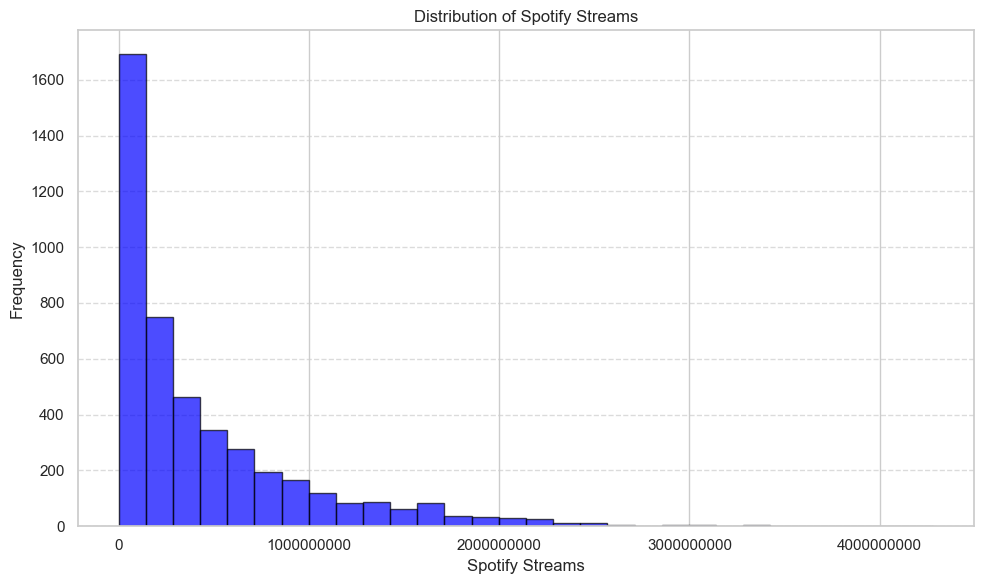

In [139]:
# TODO: Visualize the distribution of Spotify Streams
# Convert 'Spotify Streams' column to numeric
df['Spotify Streams'] = pd.to_numeric(df['Spotify Streams'].fillna(0).str.replace(",", ""), errors='coerce')

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Spotify Streams'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Spotify Streams')
plt.xlabel('Spotify Streams')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

# raise NotImplementedError()

- What is your insights about above histogram?

    **TODO**: The chart above shows the distribution of song plays on Spotify. Most songs have only a few streams, while the number of songs with very high streams is very small. This shows that music listening activities on Spotify follow the rule "a few people are many, many people are few" - only a few songs account for the majority of total listens. 

#### 3.4.2. Boxplot:

Visualize the Boxplot of Track Score.

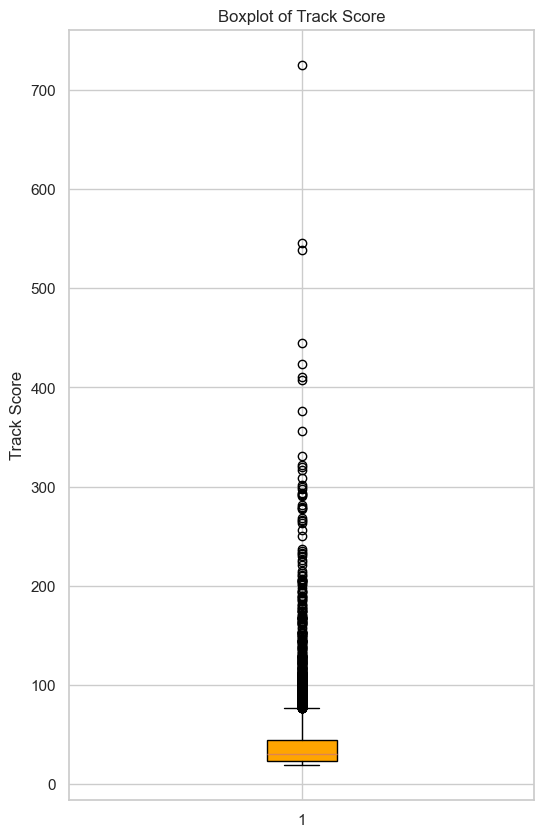

In [140]:
# TODO: Visualize the boxplot of Track Score
plt.figure(figsize=(6, 10))
plt.boxplot(df['Track Score'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='orange'))
plt.title('Boxplot of Track Score')
plt.ylabel('Track Score')
plt.show()

# raise NotImplementedError()

- What is your insights about above box plot?

    **TODO**: The boxplot above shows the distribution of track scores, where:

    1. Skewness: The distribution is skewed, with a long tail towards higher values.
    2. Median: The central tendency is around `50`.
    3. Interquartile Range: Most scores are clustered closely around the median.
    4. Outliers: The presence of extreme outliers, especially the `700` score, significantly affects the overall range

    -> The box plot of track scores reveals a highly skewed distribution with a median around `50`. While the majority of scores fall within a narrow interquartile range, the presence of several extreme outliers, particularly the score of `700`, significantly impacts the overall range. This suggests that there may be a few exceptional performances or potential data anomalies.

#### 3.4.3. Pie chart:

Visualize the pie chart showing the distribution of Explicit Track.

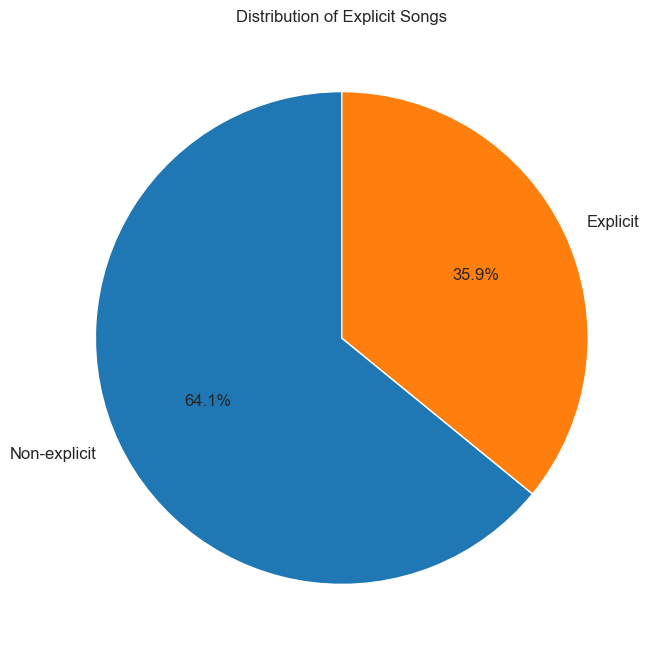

In [141]:
# TODO: Visualize the pie chart showing the distribution of Explicit Track
explicit_counts = df['Explicit Track'].value_counts()
colors = ['#1f77b4', '#ff7f0e']  

plt.figure(figsize=(8, 8))
plt.pie(explicit_counts, 
        labels=['Non-explicit', 'Explicit'], 
        autopct='%1.1f%%', 
        colors=colors, 
        startangle=90, 
        textprops={'fontsize': 12})
plt.title('Distribution of Explicit Songs')
plt.show()

# raise NotImplementedError()

- What is your insights about above pie chart?

    **TODO**: The pie chart shows the distribution of explicit and non-explicit songs, where:

    1. Non-explicit songs dominate: Over `64%` of the songs are classified as non-explicit, indicating a strong preference among listeners for clean and family-friendly content.
    2. Explicit content has a notable presence: Despite the dominance of non-explicit tracks, a substantial `35.9%` of songs contain explicit lyrics, catering to a specific audience that enjoys more mature or provocative content.

    -> In conclusion, while non-explicit songs remain popular, there's a clear market for music with more explicit lyrics, indicating that listeners have varying preferences and tolerance levels.

## 4. Question proposing & Answering

- In this section, you are going to answer my 2 questions and prose 1 question. Note that these questions can all be answered by analyzing data. Theoretically, the proposed question have to benefit at a certain level. But this is exercise about `Pandas`, my questions can be aimed more at technical side than the meaningful side. But your question has to be meaningful :v

### 4.1. Top 10 songs by streams

Find and display the top 10 songs with the highest number of streams in 2024.

In [142]:
# TODO: Answer the question
# Lấy top 10 bài hát
top_10_songs = df.drop_duplicates(subset=['Track', 'Artist']) \
                 .nlargest(10, 'Spotify Streams')[['Track', 'Artist', 'Spotify Streams']]

# Định dạng cột 'Spotify Streams' với dấu phẩy sử dụng style.format
top_10_songs = top_10_songs.style.format({'Spotify Streams': '{:,.0f}'})

display(top_10_songs)

# raise NotImplementedError()

,Track,Artist,Spotify Streams
55,Blinding Lights,The Weeknd,"4,281,468,720"
4254,Blinding Lights,xSyborg,"4,261,328,190"
53,Shape of You,Ed Sheeran,"3,909,458,734"
1637,Shape of You,xSyborg,"3,888,356,417"
132,Someone You Loved,Lewis Capaldi,"3,427,498,835"
114,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,"3,358,704,125"
19,As It Was,Harry Styles,"3,301,814,535"
262,Starboy,The Weeknd,"3,291,262,413"
519,One Dance,Drake,"3,192,204,066"
26,STAY (with Justin Bieber),The Kid LAROI,"3,107,100,349"


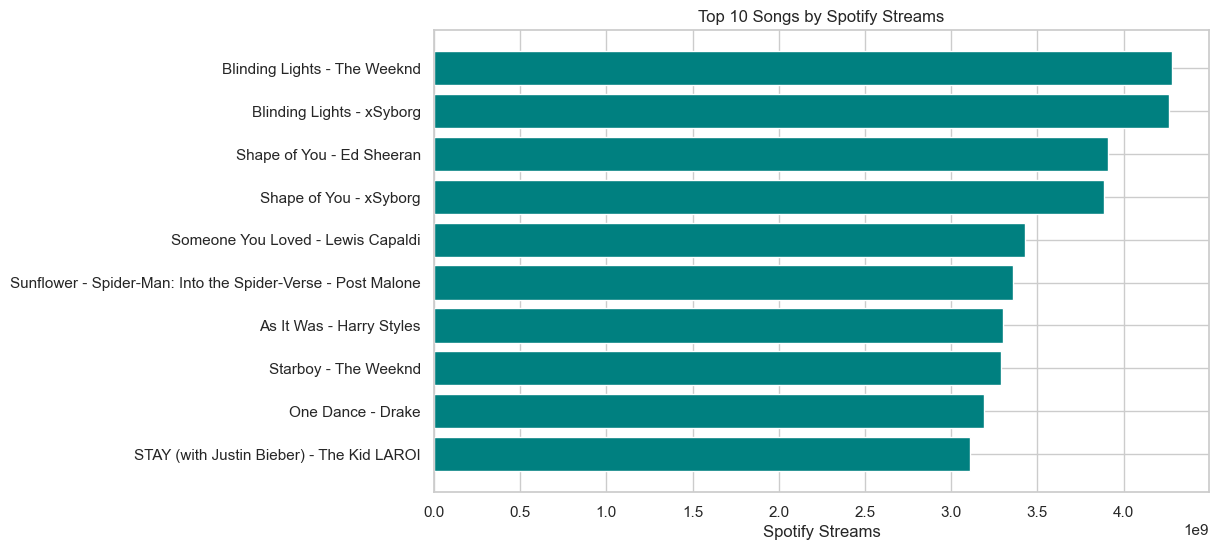

In [143]:
# TODO (OPTIONAL): Visualize
# Lấy top 10 bài hát
top_10_songs = df.drop_duplicates(subset=['Track', 'Artist']) \
                 .nlargest(10, 'Spotify Streams')[['Track', 'Artist', 'Spotify Streams']]

# Ghép tên bài hát và tên nghệ sĩ thành một cột mới, để dễ phân biệt 2 bài khác nhau mà cùng tên
top_10_songs['Song with Artist'] = top_10_songs['Track'] + ' - ' + top_10_songs['Artist']

# Chuyển 'Spotify Streams' thành chuỗi, loại bỏ dấu phẩy và chuyển thành kiểu float
top_10_songs['Spotify Streams'] = top_10_songs['Spotify Streams'].astype(str).str.replace(",", "").astype(float)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.barh(top_10_songs['Song with Artist'], top_10_songs['Spotify Streams'], color='teal')

# Đặt tiêu đề
plt.title('Top 10 Songs by Spotify Streams')

plt.xlabel('Spotify Streams')

# Đảo ngược thứ tự các bài hát để hiển thị đúng thứ tự
plt.gca().invert_yaxis()

plt.show()

### 4.2. Top 10 Artists by streams

Find and display the top 10 artists with the highest number of streams in 2024.

In [144]:
# TODO: Answer the question
# Lấy top 10 nghệ sĩ theo tổng số lượt stream
top_artists = df.groupby('Artist')['Spotify Streams'].sum().nlargest(10).reset_index()

# Định dạng cột 'Spotify Streams' với dấu phẩy bằng cách sử dụng style.format
top_artists = top_artists.style.format({'Spotify Streams': '{:,.0f}'})

display(top_artists)

# raise NotImplementedError()

,Artist,Spotify Streams
0,Bad Bunny,"37,054,834,425"
1,The Weeknd,"36,948,540,278"
2,Drake,"34,962,157,577"
3,Taylor Swift,"34,470,771,165"
4,Post Malone,"26,137,472,958"
5,Ed Sheeran,"24,014,900,390"
6,Ariana Grande,"23,464,991,696"
7,MUSIC LAB JPN,"22,866,685,573"
8,Olivia Rodrigo,"19,729,219,749"
9,Eminem,"18,878,880,174"


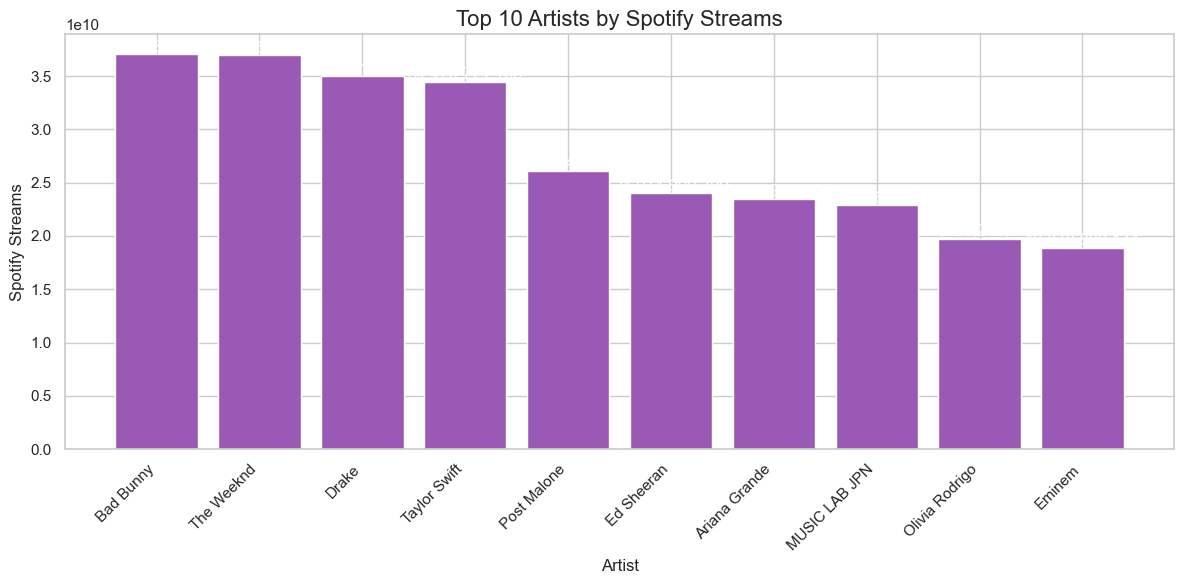

In [146]:
# TODO (OPTIONAL): Visualize
# Lấy top 10 nghệ sĩ theo tổng số lượt stream
top_artists = df.groupby('Artist')['Spotify Streams'].sum().nlargest(10).reset_index()

# Kiểm tra xem 'Spotify Streams' có phải là kiểu chuỗi hay không. Nếu là chuỗi, loại bỏ dấu phẩy và chuyển thành kiểu số
if top_artists['Spotify Streams'].dtype == 'O':  # Kiểm tra xem dữ liệu có phải là chuỗi
    top_artists['Spotify Streams'] = top_artists['Spotify Streams'].str.replace(',', '').astype(float)

# Hiển thị các cột theo thứ tự giảm dần
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Vẽ biểu đồ
plt.bar(top_artists['Artist'], top_artists['Spotify Streams'], color='#9b59b6')

# Đặt tiêu đề và nhãn
plt.title('Top 10 Artists by Spotify Streams', fontsize=16)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Spotify Streams', fontsize=12)

# Thêm giá trị số lượt nghe vào trên các cột
for i, v in enumerate(top_artists['Spotify Streams']):
    plt.text(i, v, f"{v:,.0f}", ha='center', va='bottom', color='white')

# Xoay nhãn trục X và điều chỉnh layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

### 4.3. Your question?


> Question (Reach Efficiency Analysis):
The dataset contains information on playlist reach and count from multiple platforms (e.g., Spotify, YouTube, Deezer, and Apple Music), calculate the *Reach Efficiency* for each song. Use the following formula:
>
> $$
> \text{Reach Efficiency} = \frac{\text{Total Playlist Reach}}{\text{Total Playlist Count}}
> $$
>
> Find the song with the highest Reach Efficiency and explain the steps involved in the calculation.

In [48]:
# TODO: Answer the question

# Đọc dữ liệu từ file CSV
df = pd.read_csv('./Most Streamed Spotify Songs 2024.csv', encoding='utf-8', encoding_errors='ignore')

# Đảm bảo các cột số được xử lý đúng định dạng và thay thế giá trị NaN bằng 0
df['Spotify Playlist Reach'] = pd.to_numeric(df['Spotify Playlist Reach'], errors='coerce').fillna(0)
df['YouTube Playlist Reach'] = pd.to_numeric(df['YouTube Playlist Reach'], errors='coerce').fillna(0)
df['Deezer Playlist Reach'] = pd.to_numeric(df['Deezer Playlist Reach'], errors='coerce').fillna(0)
df['Spotify Playlist Count'] = pd.to_numeric(df['Spotify Playlist Count'], errors='coerce').fillna(0)
df['Apple Music Playlist Count'] = pd.to_numeric(df['Apple Music Playlist Count'], errors='coerce').fillna(0)
df['Deezer Playlist Count'] = pd.to_numeric(df['Deezer Playlist Count'], errors='coerce').fillna(0)

# Tính Tổng Playlist Reach và Tổng Playlist Count
df['Total Playlist Reach'] = (df['Spotify Playlist Reach'] +
                              df['YouTube Playlist Reach'] +
                              df['Deezer Playlist Reach'])

df['Total Playlist Count'] = (df['Spotify Playlist Count'] +
                              df['Apple Music Playlist Count'] +
                              df['Deezer Playlist Count'])

# Tránh chia cho 0 bằng cách thay giá trị Total Playlist Count = 0 thành 1 (giữ an toàn)
df['Total Playlist Count'] = df['Total Playlist Count'].replace(0, 1)

# Tính Hiệu quả tiếp cận (Reach Efficiency)
df['Reach Efficiency'] = df['Total Playlist Reach'] / df['Total Playlist Count']

# Tìm bài hát có hiệu quả tiếp cận cao nhất
most_efficient_track = df.loc[df['Reach Efficiency'].idxmax()]

# Kết quả
print("Bài hát có hiệu quả tiếp cận cao nhất:")
print(most_efficient_track[['Track', 'Reach Efficiency', 'Total Playlist Reach', 'Total Playlist Count']])


# raise NotImplementedError()

Bài hát có hiệu quả tiếp cận cao nhất:
Track                   The Boat Beat
Reach Efficiency                749.0
Total Playlist Reach            749.0
Total Playlist Count              1.0
Name: 2831, dtype: object


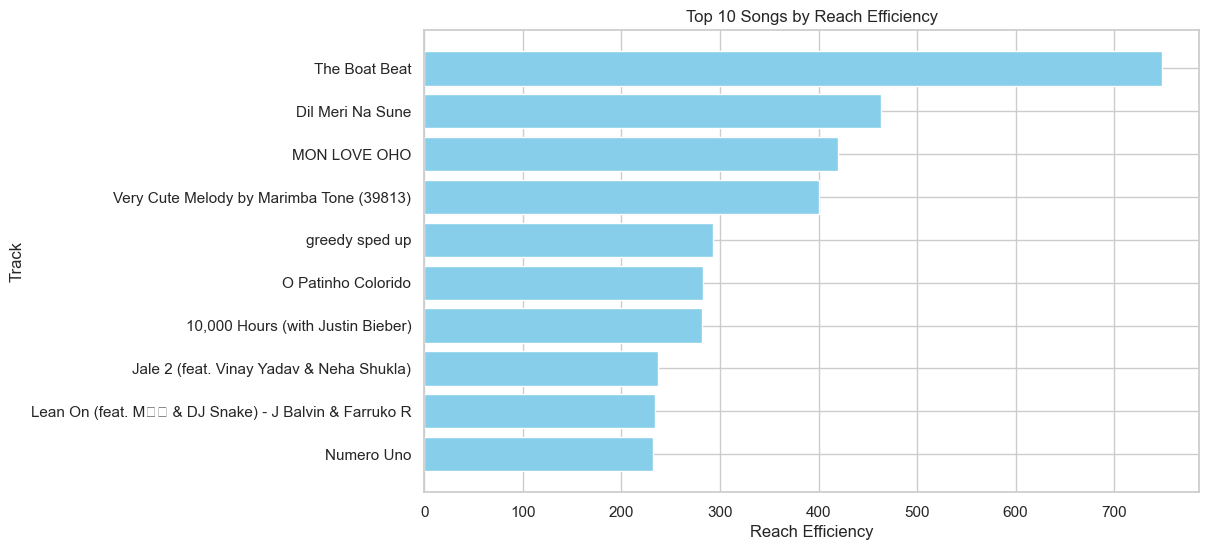

In [49]:
# TODO (OPTIONAL): Visualize

# visualize top 10 bài hát có chỉ số "Reach Efficiency" cao nhất
top_10_tracks = df.nlargest(10, 'Reach Efficiency')

plt.figure(figsize=(10, 6))
plt.barh(top_10_tracks['Track'], top_10_tracks['Reach Efficiency'], color='skyblue')
plt.xlabel('Reach Efficiency')
plt.ylabel('Track')
plt.title('Top 10 Songs by Reach Efficiency')
plt.gca().invert_yaxis()
plt.show()

**TODO**

Your insights:
> The chart displays the top 10 songs ranked by their reach efficiency. Through this, we can determine how effectively a song is reaching listeners across various streaming platforms like Spotify, YouTube, and Deezer.
>
> The chart shows that "The Boat Beat" has the highest reach efficiency, followed by "Dil Meri Na Sune" and "MON LOVE OHO". This indicates these songs are getting the most exposure and attention relative to the number of playlists they are featured on.
>
> These songs have some points in common to be ranked in top 10, such as:
>   1. Streaming optimization: The high reach efficiency suggests these songs have been strategically promoted and distributed across major streaming services, allowing them to maximize their visibility and playlist placements.
>   2. Familiarity: Many of the top songs appear to be from well-known artists or franchises (e.g. "10,000 Hours" by Justin Bieber), giving them an advantage in terms of already having an established fan base.
>   3. Catchiness: The titles and sounds of the top songs, like "The Boat Beat" and "Very Cute Melody", indicate they may have catchy, memorable hooks that make them easy to add to playlists.


Well done!